In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
import pandas as pd

In [2]:
breast_cancer = load_breast_cancer()
data = breast_cancer.data
features = breast_cancer.feature_names
df = pd.DataFrame(data, columns = features)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
# taking all rows but only 6 columns
df_small = df.iloc[:,:6]
df_small.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000


In [5]:
df.iloc[:,:6]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness
0,17.99,10.38,122.80,1001.0,0.11840,0.27760
1,20.57,17.77,132.90,1326.0,0.08474,0.07864
2,19.69,21.25,130.00,1203.0,0.10960,0.15990
3,11.42,20.38,77.58,386.1,0.14250,0.28390
4,20.29,14.34,135.10,1297.0,0.10030,0.13280
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590
565,20.13,28.25,131.20,1261.0,0.09780,0.10340
566,16.60,28.08,108.30,858.1,0.08455,0.10230
567,20.60,29.33,140.10,1265.0,0.11780,0.27700


In [6]:
correlation_mat = df_small.corr()

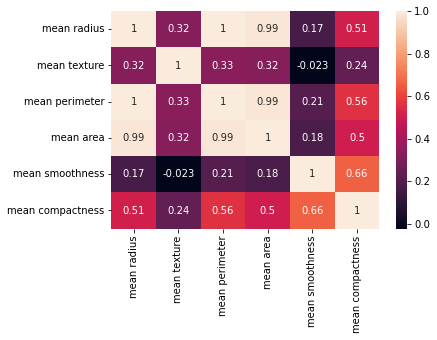

In [7]:
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [8]:
correlation_mat.unstack()

mean radius       mean radius         1.000000
                  mean texture        0.323782
                  mean perimeter      0.997855
                  mean area           0.987357
                  mean smoothness     0.170581
                  mean compactness    0.506124
mean texture      mean radius         0.323782
                  mean texture        1.000000
                  mean perimeter      0.329533
                  mean area           0.321086
                  mean smoothness    -0.023389
                  mean compactness    0.236702
mean perimeter    mean radius         0.997855
                  mean texture        0.329533
                  mean perimeter      1.000000
                  mean area           0.986507
                  mean smoothness     0.207278
                  mean compactness    0.556936
mean area         mean radius         0.987357
                  mean texture        0.321086
                  mean perimeter      0.986507
             

In [9]:
corr_values=correlation_mat.unstack()

In [10]:
corr_values.sort_values(kind="quicksort")

mean texture      mean smoothness    -0.023389
mean smoothness   mean texture       -0.023389
mean radius       mean smoothness     0.170581
mean smoothness   mean radius         0.170581
mean area         mean smoothness     0.177028
mean smoothness   mean area           0.177028
                  mean perimeter      0.207278
mean perimeter    mean smoothness     0.207278
mean texture      mean compactness    0.236702
mean compactness  mean texture        0.236702
mean area         mean texture        0.321086
mean texture      mean area           0.321086
                  mean radius         0.323782
mean radius       mean texture        0.323782
mean texture      mean perimeter      0.329533
mean perimeter    mean texture        0.329533
mean compactness  mean area           0.498502
mean area         mean compactness    0.498502
mean compactness  mean radius         0.506124
mean radius       mean compactness    0.506124
mean perimeter    mean compactness    0.556936
mean compactn

In [11]:
sorted_pairs = corr_values.sort_values(kind="quicksort")

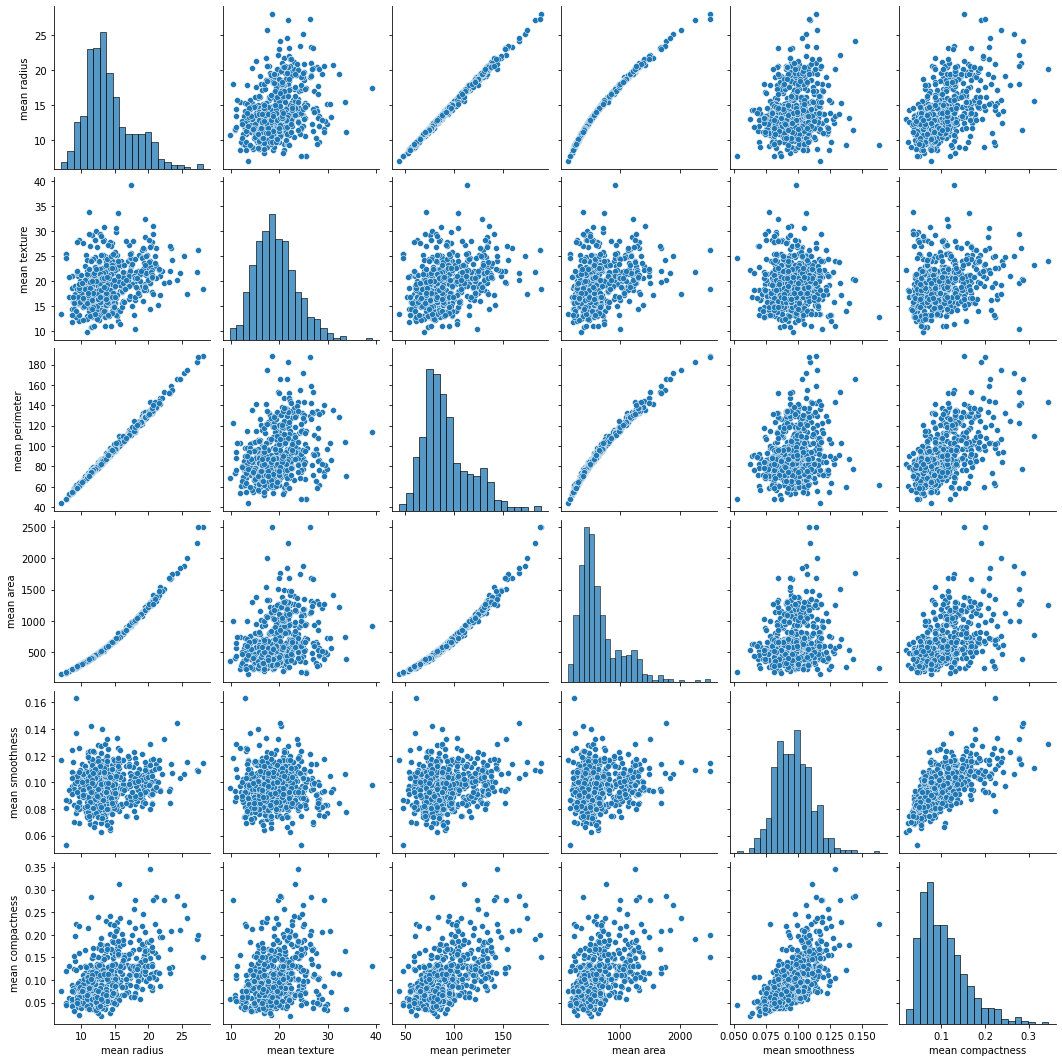

In [12]:
sns.pairplot(df_small)

In [13]:
negative_pairs = sorted_pairs[sorted_pairs < 0]

In [14]:
corr = df_small.corr()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


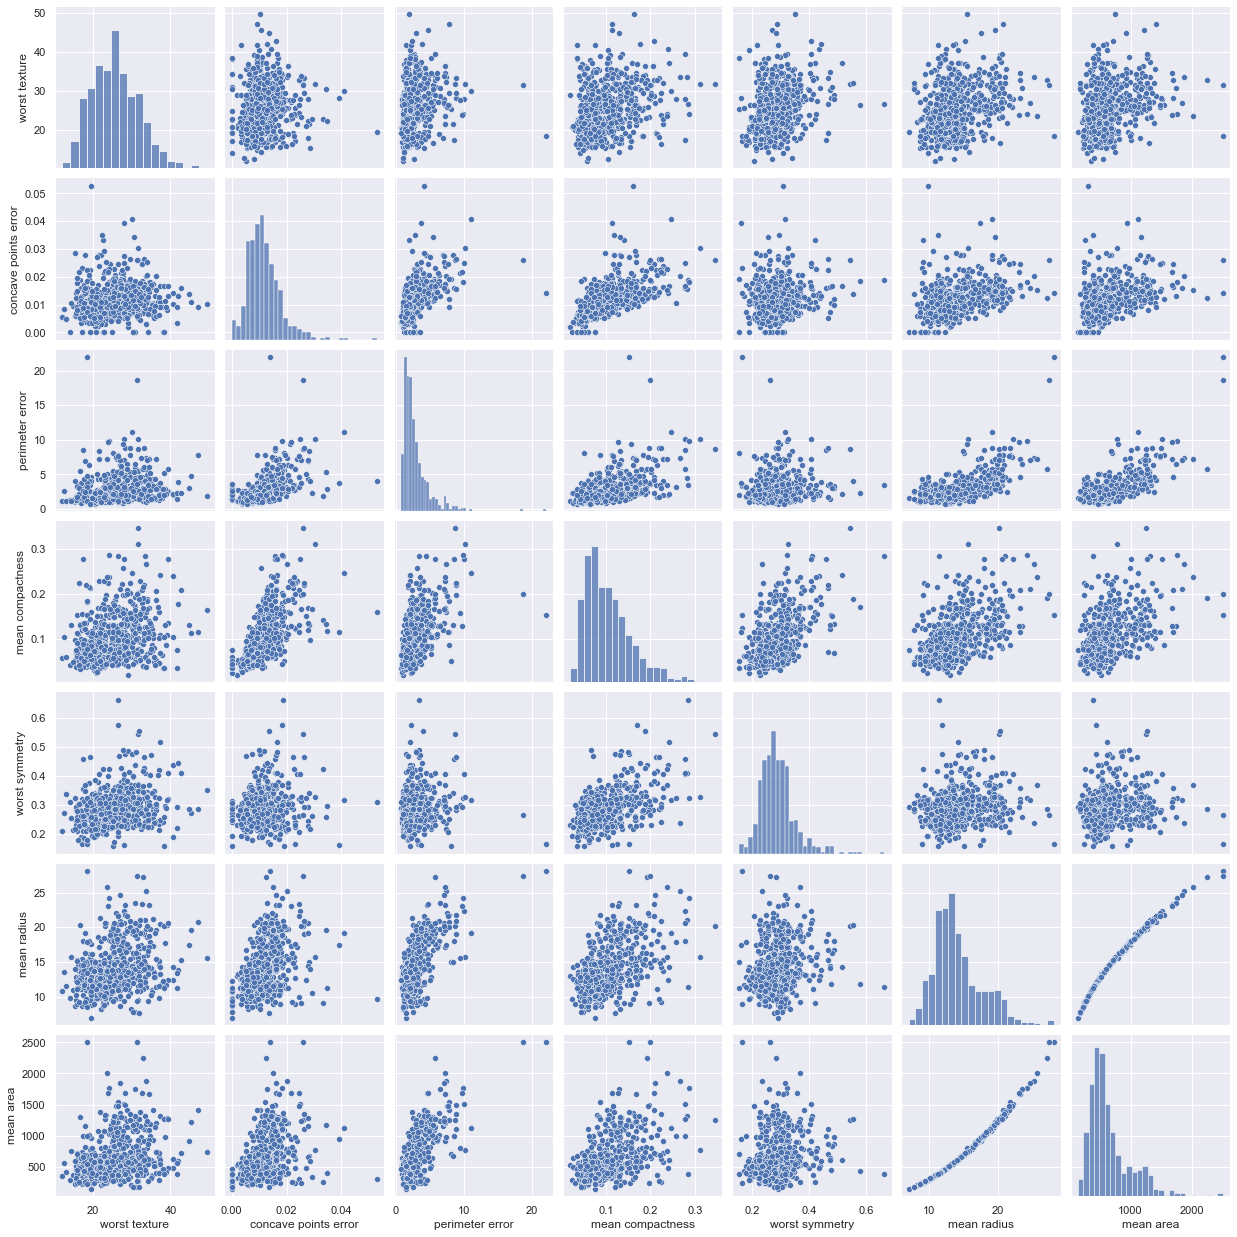

In [15]:
# Scatter plot:

sns.set()
cols = ['worst texture', 'concave points error', 
        'perimeter error',
        'mean compactness', 
        'worst symmetry',
        'mean radius', 
        'mean area']
sns.pairplot(df[cols], size = 2.5)
plt.show();